# PLA算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from numpy.linalg import cholesky
%matplotlib inline

## 生成样本数据

In [2]:
def genData(M, N = 100):
    rnd.seed(0)
    Sigma = np.array([[1, 0], [0, 1]])
    R = cholesky(Sigma)
    
    mu = np.array([[-M, 0]])
    s1 = np.dot(np.random.randn(N, 2), R) + mu
    mu = np.array([[M, 0]])
    s2 = np.dot(np.random.randn(N, 2), R) + mu
    
    return (s1,s2)

## 感知器函数
其中`train1(w, x, y)`为最初的感知器函数，而`train_2(T)`为改良版的感知器函数，其中添加了训练次数以及补偿

In [3]:
def train_1(w, x, y):
    for i in range(0,x.shape[0]):
        flag = np.sign(w[0] + np.dot(w[1:],x[i]))
        if flag != y:
            w[0] += y
            w[1:] += y * x[i]
    return w

In [4]:
def train_2(T):
    
    study_total = 100000 # 总训练次数
    study_step  = 0.001  # 训练步长
    w_total = 0          # w改变次数
    
    w = np.zeros(T.shape[1])  # 初始化权重向量为0 [权重都从0开始]
    print(' W     X      W       B')
    #训练study_total次
    for study in range(study_total):
        w_before = w    #训练前的w值
        #训练
        for t in range(T.shape[0]):
            # 计算实际的y值，其期望值为T[0][2]
            X = T[t][0:T.shape[1]-1]   #X的值
            Y = T[t][T.shape[1]-1]     #期望值
            distin = Y * (w[0] + np.dot(w[1:],X))
            #print('sign:', np.sign((w[0] + np.dot(w[1:],X))), 'Y:', Y)
            #判断X是否是误分类点
            if distin <= 0:
                # 根据误差优化w的值
                w[1:] = w[1:] + study_step*Y*X
                w[0]  = w[0] + study_step*Y
                print('w',w_total,': x',t,w[0:w.shape[0]])
                w_total = w_total + 1
                flag = 0

        #经过训练后w、b都不在变化，说明训练集中已没有误分类点，那么跳出循环
        if w_before is w :
            print('训练后，得到w:', w[0:w.shape[0]])
            break        
    return w

## 测试
### 原始训练函数测试

1. 向量的前半部分来自均值向量$m_1=[-5,0]^T$的正态分布，并且协方差矩阵$S_1=I$。向量的后半部分来自均值向量$m_2=[5,0]^T$的正态分布，并且协方差矩阵$S_2=I$。其中是一个2*2的单位矩阵。

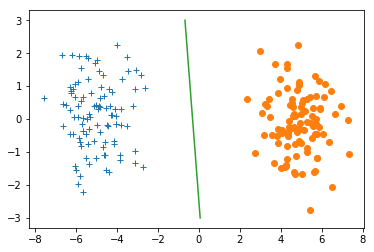

In [5]:
N = 100
mean = 5
(s1, s2) = genData(mean, N)
w = np.zeros(s1.shape[1] + 1)

train_1(w, s1, -1)
train_1(w, s2, +1)

y = np.linspace(-3,3)
x = (w[0] + w[2] * y)/w[1]


plt.plot(s1[:,0],s1[:,1],'+')
plt.plot(s2[:,0],s2[:,1],'o')
plt.plot(x,y)
plt.show()


2. 向量的前半部分来自均值向量$m_1=[-2,0]^T$的正态分布，并且协方差矩阵$S_1=I$。向量的后半部分来自均值向量$m_2=[2,0]^T$的正态分布，并且协方差矩阵$S_2=I$。其中是一个2*2的单位矩阵。

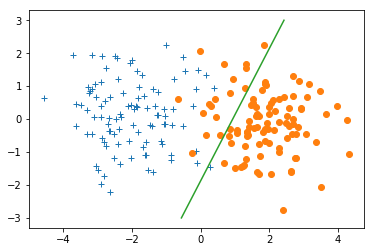

In [6]:
mean = 2
(s1, s2) = genData(mean, N)

train_1(w, s1, -1)
train_1(w, s2, +1)

y = np.linspace(-3,3)
x = (w[0] + w[2] * y)/w[1]

plt.plot(s1[:,0],s1[:,1],'+')
plt.plot(s2[:,0],s2[:,1],'o')
plt.plot(x,y)
plt.show()

3. 向量的前半部分来自均值向量$m_1=[-1,0]^T$的正态分布，并且协方差矩阵$S_1=I$。向量的后半部分来自均值向量$m_2=[1,0]^T$的正态分布，并且协方差矩阵$S_2=I$。其中是一个2*2的单位矩阵。

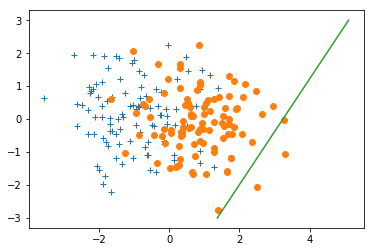

In [7]:
mean = 1
(s1, s2) = genData(mean, N)

train_1(w, s1, -1)
train_1(w, s2, +1)

y = np.linspace(-3,3)
x = (w[0] + w[2] * y)/w[1]

plt.plot(s1[:,0],s1[:,1],'+')
plt.plot(s2[:,0],s2[:,1],'o')
plt.plot(x,y)
plt.show()

### 改良版测试
其中只针对第二组数据进行个测试

 W     X      W       B
w 0 : x 0 [-0.001       0.00023595 -0.00040016]
w 1 : x 100 [ 0.          0.00186677 -0.00063954]
w 2 : x 132 [ 0.001       0.00193049 -0.00045076]
训练后，得到w: [ 0.001       0.00193049 -0.00045076]


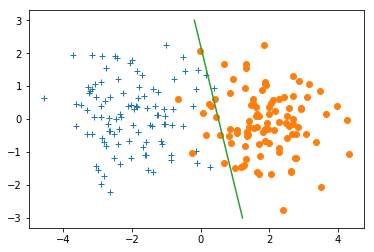

In [8]:
mean = 2
(s1, s2) = genData(mean, N)
one = np.ones(s1.shape[0]).reshape(100,1)
s1 = np.concatenate((s1, -1 * one), axis = 1)
s2 = np.concatenate((s2,  1 * one), axis = 1)
s = np.concatenate((s1, s2), axis=0)

w = train_2(s[:150])

y = np.linspace(-3,3)
x = (w[0] + w[2] * y)/w[1]

plt.plot(s1[:,0],s1[:,1],'+')
plt.plot(s2[:,0],s2[:,1],'o')
plt.plot(x,y)
plt.show()

## 结论
通过使用三种数据集对两种感知器函数进行测试，发现对于初期的感知器函数而言，如果为数据为线性可分则可以得出较好的结果，如果在感知器函数中加入训练步长和总的训练次数也可以使得拥有小量噪声的数据得到较好的分类